# Библиотеки Python для DS (семинары)



## Урок 3. Практическая работа. Построение модели Линейной регрессии
В качестве датасета используется набор данных о жилищных условиях и ценах на жилье в Калифорнии (California housing dataset), доступный в библиотеках Python (например, sklearn.datasets).

### Анализ и подготовка данных:

#### — Загрузите датасет California housing dataset.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

In [10]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Набор данных о жилой недвижимости в Калифорнии
Характеристики набора данных:

:Информация о атрибутах:
 - **MedInc** медианный доход в группе кварталов
 - **HouseAge** медианный возраст домов в группе кварталов
 - **AveRooms** среднее количество комнат на домохозяйство
 - **AveBedrms** среднее количество спален на домохозяйство
 - **Population** население в группе кварталов\
 - **AveOccup** среднее количество членов домохозяйства
 - **Latitude** широта группы кварталов
 - **Longitude** долгота группы кварталов

####— Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB



* Количество экземпляров: 20,640

* Количество атрибутов: 8 числовых, предсказательных атрибутов и целевой атрибут

* Отсутствующие атрибуты: Нет

#### — Визуализируйте распределения нескольких выбранных числовых переменных и корреляции между ними.

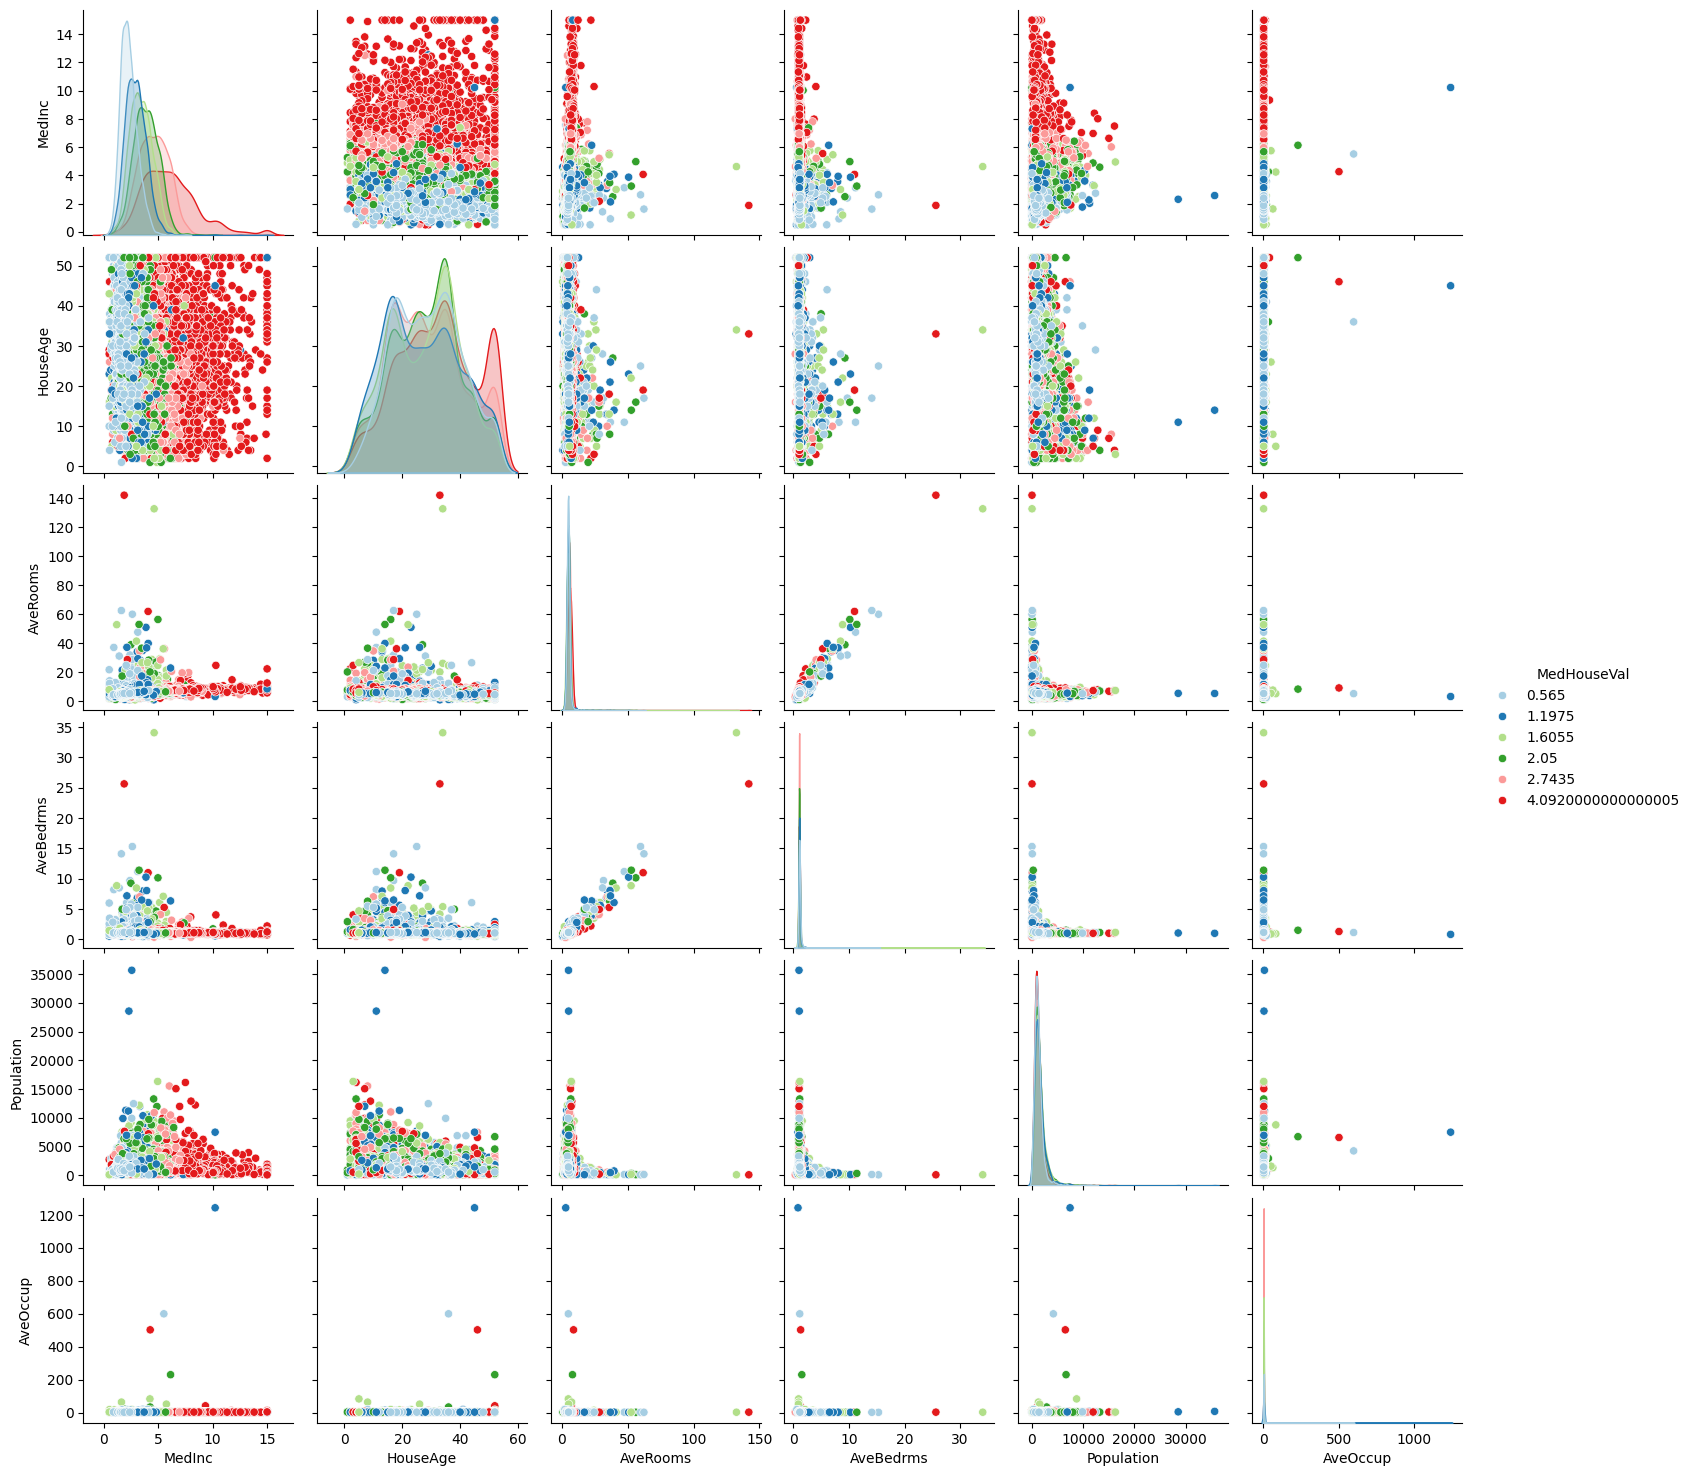

In [24]:
# Убираем Широту и долготу
columns_drop = ["Longitude", "Latitude"]
subset = df.drop(columns=columns_drop)
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="Paired")

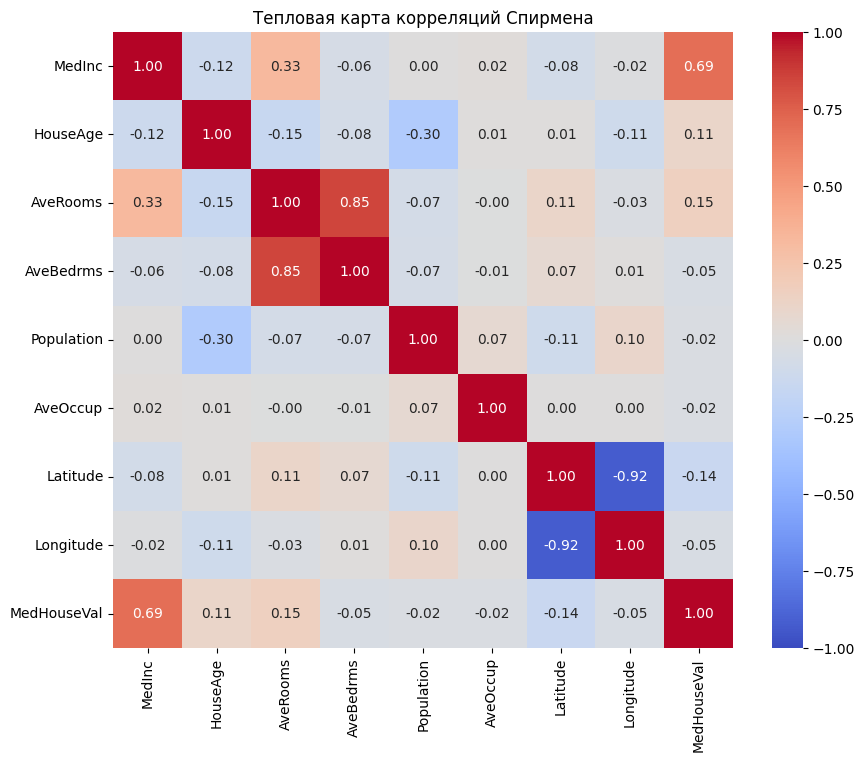

In [19]:
# Тепловая карта корреляций

correlation_matrix = df.corr(method='pearson')  # Вычисляем матрицу корреляций Пирсона
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Пирсона')
plt.show()

Основные Корреляции:

1. MedInc и MedHouseVal:

Сильная положительная корреляция. Это указывает на то, что более высокий медианный доход в районе (MedInc) ассоциируется с более высокими значениями стоимости домов (MedHouseVal).

2. HouseAge:

Корреляция с MedHouseVal отрицательная, но не очень сильная. Это может указывать на то, что возраст домов не является главным фактором, влияющим на стоимость.

3. AveRooms и AveBedrms:

Высокая положительная корреляция. Это логично, так как большее количество комнат обычно включает большее количество спален.

4. Population и AveOccup:

Положительная корреляция. Это указывает на то, что увеличивающееся население района связано с большим количеством членов домохозяйства.

5. Latitude и MedHouseVal:

Широта показывает слабую отрицательную корреляцию со стоимостью домов, что может отражать географическое распределение цен на жилье.

###Построение модели линейной регрессии:

####— Разделите данные на обучающий и тестовый набор в соотношении 80/20.

In [26]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####— Используйте только две переменные (по вашему выбору) для построения модели линейной регрессии. Обоснуйте ваш выбор.

In [39]:
# Выбор двух переменных с наибольшей корреляцией с целевой переменной
selected_features = ['MedInc', 'AveRooms']

Обоснование выбора переменных:

**MedInc:** Средний доход имеет высокую корреляцию с ценами на жилье. Чем выше доход, тем выше могут быть цены на жилье.

**AveRooms:** Среднее количество комнат на жилье также имеет значительную корреляцию с ценами на жилье, так как большее количество комнат обычно связано с более высокими ценами.

Эти переменные были выбраны на основе их корреляции с целевой переменной MedHouseVal. Визуализация и корреляционный анализ подтверждают их значимость для построения модели.

####— Постройте модель линейной регрессии, обучите ее на обучающем наборе и сделайте предсказания на тестовом.

In [40]:
# Разделение данных на обучающую и тестовую выборки
X = df[selected_features]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

####— Оцените качество модели с помощью подходящих метрик (R2, MSE, MAE).

In [41]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 0.7021550469058006
MAE: 0.624682807713972
R²: 0.4641710652437856


Значение MSE = 0.702 указывает на некоторую степень ошибки, что свидетельствует о том, что модель не идеальна.

Значение MAE = 0.625 указывает на то, что в среднем модель ошибается на 0.625 единиц.

Значение R² = 0.464 указывает на то, что модель объясняет примерно 46.4% вариативности данных. Это означает, что более половины вариативности данных остается необъясненной моделью, что указывает на то, что модель могла бы быть улучшена.

####— Проведите эксперименты с различными признаками, попробуйте увеличить количество признаков и сравните с базовыми метриками.

#####Выберем все прказатели

In [43]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Разделение данных на обучающую и тестовую выборки
X = df[selected_features]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 0.5558915986952444
MAE: 0.5332001304956553
R²: 0.5757877060324508


**Сравнение с предыдущими значениями:**

 Значение MSE уменьшилось, что указывает на то, что модель стала предсказывать более точно. Это значительное улучшение, поскольку средняя квадратичная ошибка уменьшилась.

 Значение MAE также уменьшилось, что указывает на уменьшение средней абсолютной ошибки предсказаний. Модель стала лучше в среднем на 0.092 единицы.

Значение R² увеличилось, что указывает на улучшение объясненной вариативности данных. Теперь модель объясняет 57.6% вариативности данных по сравнению с предыдущими 46.4%.

Заключение:
Использование всех переменных значительно улучшило производительность модели. Это видно из уменьшения значений MSE и MAE, а также увеличения значения R².

######Оставим только следующие признаки 'MedInc', 'HouseAge', 'AveRooms', 'Latitude'

In [44]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']

# Разделение данных на обучающую и тестовую выборки
X = df[selected_features]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 0.6495475488975627
MAE: 0.5993913548627591
R²: 0.5043169272470043


**Сравнение с предыдущими значениями:**

Использование всех переменных привело к значительному уменьшению MSE, что указывает на улучшение модели. Использование только MedInc, HouseAge, AveRooms, и Latitude также улучшило модель по сравнению с использованием только MedInc и AveRooms, но не так сильно, как добавление всех переменных.

MAE также показывает улучшение при добавлении переменных. Использование всех переменных привело к наибольшему уменьшению MAE, но добавление HouseAge и Latitude также улучшило модель по сравнению с использованием только MedInc и AveRooms.

Значение R² увеличилось при добавлении переменных. Все переменные дали наибольшее увеличение, но использование только MedInc, HouseAge, AveRooms, и Latitude также улучшило объясняющую способность модели по сравнению с первоначальным набором переменных.

**Вывод:**

Добавление переменных HouseAge и Latitude улучшило модель по сравнению с использованием только MedInc и AveRooms, но полное улучшение не достигло уровня, который был при использовании всех доступных переменных. Это указывает на то, что каждая из переменных может вносить свой вклад в объяснение вариативности данных и уменьшение ошибки предсказаний.

